# Dummy email Filter

In [9]:
import pandas as pd

In [10]:
email_data = pd.read_csv("../email.csv")
email_data.head()

,primary_email,secondary_email
0,"[""info@exitbeveiliging.nl""]",[]
1,"[""meister@klima-lange.de""]",[]
2,"[""jules@autourduparquet.fr""]",[]
3,"[""hedylapkin@gmail.com""]",[]
4,"[""bucuresti@oltextur.ro""]",[]


In [11]:
email_data['secondary_email'].unique().shape

(11432,)

In [12]:
email_data.shape

(181554, 2)

In [13]:
unique_email = email_data['primary_email'].unique()

In [14]:
d = email_data.drop_duplicates()

In [15]:
d['secondary_email'].unique()

array(['[]', '["rudinsheshi1@gmail.com"]',
       '["ocran@ek-brandconsult.com"]', ...,
       '["79224121756@yandex.ru", "alexprolopatin@gmail.com", "binh@ukr.net", "fotosalon@list.ru", "konstbtk@mail.ru", "kurteanu@inbox.ru", "mazahaka5310@gmail.com", "office.uzl@mail.ru", "photo.mag@mail.ru", "s.e.r@list.ru", "saadi77@mail.ru", "sansho8261@gmail.com", "scitex@ukr.net", "u-yurika@yandex.ru", "yulja2210@ukr.net"]',
       '["grangrill2019@gmail.com"]', '["youremail@company.com"]'],
      dtype=object)

In [16]:
d['secondary_email'].value_counts()

[]                                                                        143815
["enteryour@addresshere.com"]                                                284
["contact@onlinevisionmarket.com", "webmaster@onlinevisionmarket.com"]        45
["john@doe.com"]                                                              41
["assistance@shopify.com"]                                                    20
                                                                           ...  
["myounes@icloud.com"]                                                         1
["info@haugundpartner.de"]                                                     1
["doglodge-hundepension@t-online.de"]                                          1
["kontakt@unicorn-factory.net"]                                                1
["youremail@company.com"]                                                      1
Name: secondary_email, Length: 11432, dtype: int64

In [17]:
email_data['primary_email'].value_counts()[20]

30

In [18]:
email_data['secondary_email'].value_counts()[:20]

[]                                                                        166823
["enteryour@addresshere.com"]                                                514
["john@doe.com"]                                                              76
["contact@onlinevisionmarket.com", "webmaster@onlinevisionmarket.com"]        57
["info@company.com"]                                                          28
["mllegeorgesand@gmail.com"]                                                  27
["example@gmail.com"]                                                         25
["youremail@gmail.com"]                                                       23
["su-email@ejemplo.com"]                                                      23
["assistance@shopify.com"]                                                    21
["masterpost@sekurpro.com"]                                                   21
["support@gmail.com"]                                                         19
["mustermann@musterfirma.de"

# unpacking emails

In [28]:
def unpack_email(email_data,columns=["primary_email","secondary_email"]):
    email_list = []
    for col in columns:
        for item in email_data[col]:
            email_list += item.strip('][').replace('"',"").split(', ')
    return email_list

In [29]:
email_list = unpack_email(email_data,columns=["secondary_email"])


In [33]:
item = 'a'
item.strip('][').replace('"',"").split(', ')

['a']

In [14]:
email_list = pd.DataFrame(email_list,columns=["email"])

In [15]:
email_list

,email
0,grangrill2019@gmail.com
1,
2,
3,
4,
...,...
174113,yulja2210@ukr.net
174114,
174115,
174116,


In [16]:
email_list.value_counts()[:20]

email                           
                                    151870
enteryour@addresshere.com              493
john@doe.com                            76
contact@onlinevisionmarket.com          51
webmaster@onlinevisionmarket.com        51
ugyfelszolgalat@naih.hu                 38
info@company.com                        33
youremail@gmail.com                     26
example@gmail.com                       26
assistance@shopify.com                  25
mllegeorgesand@gmail.com                25
su-email@ejemplo.com                    20
support@gmail.com                       19
masterpost@sekurpro.com                 19
privacy@twitter.com                     19
test@test.com                           18
support@ovh.com                         17
noreply@envato.com                      17
contact@company.com                     17
edconcept24@gmail.com                   16
dtype: int64

In [17]:
email_list.value_counts()[-20:]

email                                               
ihsan.bayoglu@gmail.com                                 1
ihsan.poyraz@teamneunzehn.at                            1
iimaumehara@gmail.com                                   1
iinfo@protech-autoalarm.de                              1
ijsrrhb8gdu2rffb1ob1du0u54@group.calendar.google.com    1
ikdoemee@boxduurzaam.nl                                 1
ikk.serviceteam@ikk-classic.de                          1
il@egolook.ru                                           1
ilarib@alice.it                                         1
iletisim@busraninonerisi.com.tr                         1
ilias.benjeddi@rabobank.com                             1
ilightfoot@conveyormanagement.com                       1
ilinaya@pskovtehgaz.ru                                  1
ille@crosseye.de                                        1
ilmari.ranta@outlook.com                                1
ilona.podgorna@sothebysrealty.com                       1
ilse.brouwer@raboba

In [18]:
email_freq_counter = email_list.value_counts()

In [19]:
email_freq_counter[:10]

email                           
                                    151870
enteryour@addresshere.com              493
john@doe.com                            76
contact@onlinevisionmarket.com          51
webmaster@onlinevisionmarket.com        51
ugyfelszolgalat@naih.hu                 38
info@company.com                        33
youremail@gmail.com                     26
example@gmail.com                       26
assistance@shopify.com                  25
dtype: int64

In [20]:
len(email_freq_counter)

17668

In [21]:
email_freq_df = email_freq_counter.rename_axis('unique_values').to_frame(name='counts')
email_freq_df

,counts
unique_values,
,151870
enteryour@addresshere.com,493
john@doe.com,76
contact@onlinevisionmarket.com,51
webmaster@onlinevisionmarket.com,51
...,...
ilona.podgorna@sothebysrealty.com,1
ilse.brouwer@rabobank.com,1
ilsimox@gmail.com,1


In [22]:
email_freq_df.value_counts()

counts
1         15327
2          1716
3           379
4           101
5            41
6            21
8            16
7            14
12            9
10            8
15            7
9             5
11            3
17            3
19            3
25            2
26            2
51            2
14            1
16            1
18            1
20            1
33            1
38            1
76            1
493           1
151870        1
dtype: int64

In [23]:
data = email_freq_df.value_counts().rename_axis('duplication_counts').reset_index(name='counts')
pd.set_option('display.max_rows', None)
print(data)

    duplication_counts  counts
0                    1   15327
1                    2    1716
2                    3     379
3                    4     101
4                    5      41
5                    6      21
6                    8      16
7                    7      14
8                   12       9
9                   10       8
10                  15       7
11                   9       5
12                  11       3
13                  17       3
14                  19       3
15                  25       2
16                  26       2
17                  51       2
18                  14       1
19                  16       1
20                  18       1
21                  20       1
22                  33       1
23                  38       1
24                  76       1
25                 493       1
26              151870       1


In [24]:
data.columns

Index(['duplication_counts', 'counts'], dtype='object')

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='duplication_counts', ylabel='counts'>

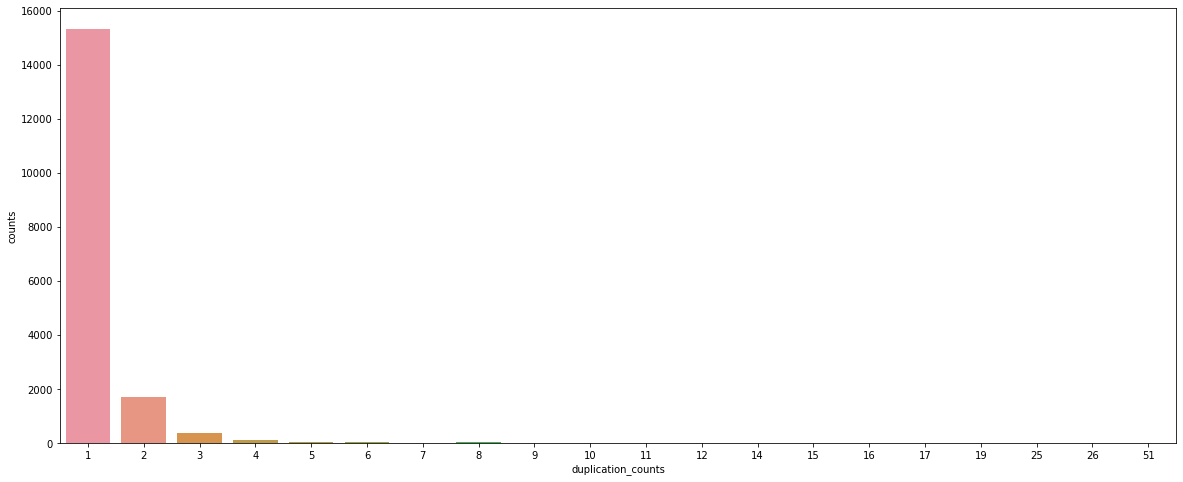

In [26]:
plt.figure(figsize=(20,8))
sns.barplot(x=data.columns[0],y=data.columns[1],data=data[:20])

# collecting dummy emails

In [27]:
# dummy_email = 
dummy_email = email_freq_df[email_freq_df["counts"]>=5]

In [28]:
dummy_email.reset_index(inplace=True)
dummy_email = dummy_email.rename(columns={'unique_values':'emails'})

In [29]:
dummy_email = dummy_email['emails']
dummy_email

0                                                       
1                              enteryour@addresshere.com
2                                           john@doe.com
3                         contact@onlinevisionmarket.com
4                       webmaster@onlinevisionmarket.com
5                                ugyfelszolgalat@naih.hu
6                                       info@company.com
7                                    youremail@gmail.com
8                                      example@gmail.com
9                                 assistance@shopify.com
10                              mllegeorgesand@gmail.com
11                                  su-email@ejemplo.com
12                                     support@gmail.com
13                               masterpost@sekurpro.com
14                                   privacy@twitter.com
15                                         test@test.com
16                                       support@ovh.com
17                             

In [30]:
dummy_email = dummy_email[dummy_email!=""]

# Saving dummy_primary email

In [31]:
dummy_email.to_csv('dummy_primary_email.csv',index=False)

# Reading dummy email from csv

In [32]:
dummy_email = pd.read_csv("dummy_primary_email.csv")
dummy_email

,emails
0,enteryour@addresshere.com
1,john@doe.com
2,contact@onlinevisionmarket.com
3,webmaster@onlinevisionmarket.com
4,ugyfelszolgalat@naih.hu
5,info@company.com
6,youremail@gmail.com
7,example@gmail.com
8,assistance@shopify.com
9,mllegeorgesand@gmail.com


# Dummy email collector


In [33]:
email_data = pd.read_csv("../email.csv")

In [34]:
def unpack_list(data,columns=["primary_email","secondary_email"]):
    data_list = []
    for col in columns:
        if col in data.columns:
            for item in data[col]:
                data_list += item.strip('][').replace('"',"").split(', ')
    return data_list

In [35]:
def dummy_email_collector(dataframe,columns=['primary_email','secondary_email'],threshold=20,file_name="dummy_email"):
    try:
        email_list = unpack_list(dataframe,columns=columns)
        print("length of total primary email : ",len(email_list))
        email_list = pd.DataFrame(email_list,columns=["email"])
        email_freq_df = email_list.value_counts().rename_axis('email').to_frame(name='counts')
        # dummy_email = 
        dummy_email = email_freq_df[email_freq_df["counts"]>=threshold]
        dummy_email.reset_index(inplace=True)
#         dummy_email = dummy_email.rename(columns={'unique_values':'emails'})
        dummy_email = dummy_email['email']
        dummy_email = dummy_email[dummy_email!=""]
        print("print length of the dummy emails: ",len(dummy_email))
        #saving file
        dummy_email.to_csv(f'{file_name}.csv',index=False)
        print("status:file saved")
    except:
        print("status: error")
    

In [36]:
dummy_email_collector(email_data,columns=["primary_email"],threshold=5,file_name="dummy_primary_email")

length of total primary email :  261051
print length of the dummy emails:  953
status:file saved


In [37]:
dummy_email_collector(email_data,columns=["secondary_email"],threshold=20,file_name="dummy_secondary_emails")

length of total primary email :  174118
print length of the dummy emails:  11
status:file saved


# Dummy Phone Number Analysis

In [ ]:
phone_nums = pd.read_csv("../phone.csv")
phone_nums.head()

In [ ]:
phone_nums = unpack_list(phone_nums,columns=['primary_phone'])
phone_nums = pd.DataFrame(phone_nums,columns=["phone"])

In [ ]:
phone_nums.value_counts()

In [ ]:
pd.set_option('display.max_rows', 10)

In [ ]:
phone_freq_df = phone_nums.value_counts().rename_axis('unique_values').to_frame(name='number of duplication')
phone_freq_df

In [ ]:
phone_freq_df.value_counts()

# dummy social link analysis

In [ ]:
social_data = pd.read_csv("../profile_entity.csv")
social_data.head()

In [ ]:
unpack_list(social_data,columns=["primary_profile"])

In [ ]:
len(unpack_list(social_data,columns=["primary_profile"]))

In [ ]:
profile_entity = unpack_list(social_data,columns=['primary_profile'])
profile_entity = pd.DataFrame(profile_entity,columns=["profile"])

In [ ]:
profile_entity.value_counts()

# Collecting dummy phone in csv file

In [ ]:
import os
import json

In [ ]:
os.listdir()

In [ ]:
def dummy_items_collector(dataframe,columns=['primary_email','secondary_email'],threshold=20,save_to="json",json_file="dummy_data.json"):
    kind = columns[0].split('_')[1]
    if len(columns)>1:
        file_name = "dummy_"+str(kind)
    else:
        file_name="dummy_"+columns[0]
    try:
        item_list = unpack_list(dataframe,columns=columns)
        print(f"length of total primary {kind} : {len(item_list)}")
        item_list = pd.DataFrame(item_list,columns=[kind])
        item_freq_df = item_list.value_counts().rename_axis(kind).to_frame(name='counts')
       
        dummy_item = item_freq_df[item_freq_df["counts"]>=threshold]
        dummy_item.reset_index(inplace=True)

        dummy_item = dummy_item[kind]
        dummy_item = dummy_item[dummy_item!=""]
        print(f"print length of the dummy {kind}: {len(dummy_item)}")
        #saving file
        if save_to == "csv":
            dummy_item.to_csv(f'{file_name}.csv',index=False)
            print(f" status:file {file_name}.csv saved")
        elif save_to == "json":
            #reading json file if available
            
            if json_file not in os.listdir():
                with open(json_file,'w') as file:
                    file.write("{}")
            print(json_file,"saved")
            with open(json_file,"r+") as file:
                dummy_data = json.loads(file.read())
                if kind not in dummy_data.keys():
                    dummy_data[kind]={}
                dummy_data[kind][threshold] = list(dummy_item)
            #save data
            with open(json_file, 'w') as file:  
                  json.dump(dummy_data,file)
            return dummy_data
            
    except Exception as e:
        print("status: error",e)

In [ ]:
def generate_dummy_json(files=['email.csv','phone.csv',],path="../",columns=['primary','secondary'],threshold_list=[5,20]):
    
    for file in files:
        file_path = path+file
        for threshold in threshold_list:
            dataframe = pd.read_csv(file_path)
            #transform columns value to the dummy_items_collector argument
            col_list = []
            for col in columns:
                col_list.append(col+"_"+file.split(".")[0])
            print(file)
            print(col_list)
            dummy_items_collector(dataframe,columns=col_list,
                                  threshold=threshold,
                                  save_to="json")
            


In [ ]:
generate_dummy_json(files=['email.csv','phone.csv','profile.csv'])

In [ ]:
phone_data = pd.read_csv('../phone.csv')
phone_data

In [ ]:
dummy_items_collector(phone_data,columns=["primary_phone","secondary_phone"],threshold=5)

In [ ]:
# dummy_items_collector(phone_data,columns=["secondary_phone"],threshold=20)

In [ ]:
pd.read_csv("dummy_phone.csv")

# dummy_email validator

In [ ]:
def is_dummy(email_string,kind="email",threshold_value=5,dummy_records="dummy_data.json"):
    #loading json file
    with open(dummy_records,'r+') as file:
        dummy_data = json.loads(file.read())
    
    if email_string in dummy_data[kind][str(threshold_value)]:
        return True
    else:
        return False

In [ ]:
is_dummy("enteryour@addresshere.com")

In [ ]:
is_dummy("enteryours@addresshere.com")

In [ ]:
is_dummy("wordpress",kind="profile")

In [ ]:
is_dummy("unknown",kind="profile")

# Refactoring the code

In [38]:
import os
import json

In [64]:
def unpack_list(data,columns=["primary_email","secondary_email"]):
    data_list = []
    for col in columns:
        if col in data.columns:
            for item in data[col]:
                data_list += str(item).strip('][').replace('"',"").split(', ')
    return data_list

In [70]:
def dummy_items_collector(dataframe,columns=['primary_email','secondary_email'],threshold=20,save_to="json",json_file="dummy_data.json"):
    kind = columns[0].split('_')[1]
    if len(columns)>1:
        file_name = "dummy_"+str(kind)
    else:
        file_name="dummy_"+columns[0]
    try:
        item_list = unpack_list(dataframe,columns=columns)
        print(f"length of total {kind} : {len(item_list)}")
        item_list = pd.DataFrame(item_list,columns=[kind])
        item_freq_df = item_list.value_counts().rename_axis(kind).to_frame(name='counts')
       
        dummy_item = item_freq_df[item_freq_df["counts"]>=threshold]
        dummy_item.reset_index(inplace=True)

        dummy_item = dummy_item[kind]
        dummy_item = dummy_item[dummy_item!=""]
        print(f"print length of the dummy {kind}: {len(dummy_item)}")
        #saving file
        if save_to == "csv":
            dummy_item.to_csv(f'{file_name}.csv',index=False)
            print(f" status:file {file_name}.csv saved")
        elif save_to == "json":
            #reading json file if available
            
            if json_file not in os.listdir():
                with open(json_file,'w') as file:
                    file.write("{}")
            print(json_file,"saved")
            with open(json_file,"r+") as file:
                dummy_data = json.loads(file.read())
                if kind not in dummy_data.keys():
                    dummy_data[kind]={}
                flag = "primary" if threshold == 5 else "secondary"
                dummy_data[kind][flag] = list(dummy_item)
            #save data
            with open(json_file, 'w') as file:  
                  json.dump(dummy_data,file)
            return dummy_data
            
    except Exception as e:
        print("status: error",e)

In [66]:
def generate_dummy_json(files=['email.csv','phone.csv',"social.csv"],path="../",columns=['primary','secondary'],threshold_list=[5,20]):
    
    for file in files:
        file_path = path+file
        for threshold in threshold_list:
            dataframe = pd.read_csv(file_path,index_col=False)
            #transform columns value to map to the dummy_items_collector's columns argument
            col_list = []
            for col in columns:
                col_list.append(col+"_"+file.split(".")[0])
            dummy_items_collector(dataframe,columns=col_list,
                                  threshold=threshold,
                                  save_to="json")
            


In [72]:
def is_dummy(item_string,kind="email",subtype="primary",dummy_records="dummy_data.json"):
    #loading json file
    with open(dummy_records,'r+') as file:
        dummy_data = json.loads(file.read())
    
    if item_string in dummy_data[kind][subtype]:
        return True
    else:
        return False

In [69]:
#generate dummy_record
generate_dummy_json()

length of total primary email : 477274
print length of the dummy email: 1220
dummy_data.json saved
length of total primary email : 477274
print length of the dummy email: 133
dummy_data.json saved
length of total primary phone : 368939
print length of the dummy phone: 1161
dummy_data.json saved
length of total primary phone : 368939
print length of the dummy phone: 99
dummy_data.json saved
length of total primary social : 421447
print length of the dummy social: 3403
dummy_data.json saved
length of total primary social : 421447
print length of the dummy social: 241
dummy_data.json saved


In [73]:
is_dummy(item_string="iframe_api",kind="social",subtype="primary")

True

In [75]:
is_dummy(item_string="iframe_apii",kind="social",subtype="secondary")

False